In [13]:
import sys
import pandas as pd
import numpy as np
sys.path.append('../../..')
from src import load_image, ImageQuant2
%matplotlib widget

In [14]:
membg = np.loadtxt('../../../data/calibration_mem6.txt')
cytbg = np.loadtxt('../../../data/calibration_cyt.txt')
calibration_factor = np.loadtxt('../../../data/calibration_constants.txt')[6]

In [15]:
df = pd.read_csv('../../../data/PH_NEBD_Embryos_dataframe.csv')
df

,Unnamed: 0,Path,EmbryoID,Line,Date,RNAi
0,0,/Users/blandt/Desktop/PaperData/Imaging/PH run...,1556901861,n2,190503,wt
1,1,/Users/blandt/Desktop/PaperData/Imaging/PH run...,1556901937,n2,190503,wt
2,2,/Users/blandt/Desktop/PaperData/Imaging/PH run...,1556902036,n2,190503,wt
3,3,/Users/blandt/Desktop/PaperData/Imaging/PH run...,1556902453,n2,190503,wt
4,4,/Users/blandt/Desktop/PaperData/Imaging/PH run...,1556902969,n2,190503,wt
5,5,/Users/blandt/Desktop/PaperData/Imaging/PH run...,1559137737,n2,190529,wt
6,6,/Users/blandt/Desktop/PaperData/Imaging/PH run...,1559137889,n2,190529,wt
7,7,/Users/blandt/Desktop/PaperData/Imaging/PH run...,1565356359,od58,190809,1908081630xfp
8,8,/Users/blandt/Desktop/PaperData/Imaging/PH run...,1565356740,od58,190809,1908081630xfp
9,9,/Users/blandt/Desktop/PaperData/Imaging/PH run...,1565356899,od58,190809,1908081630xfp


### Quantify

100%|██████████| 600/600 [00:15<00:00, 39.97it/s]


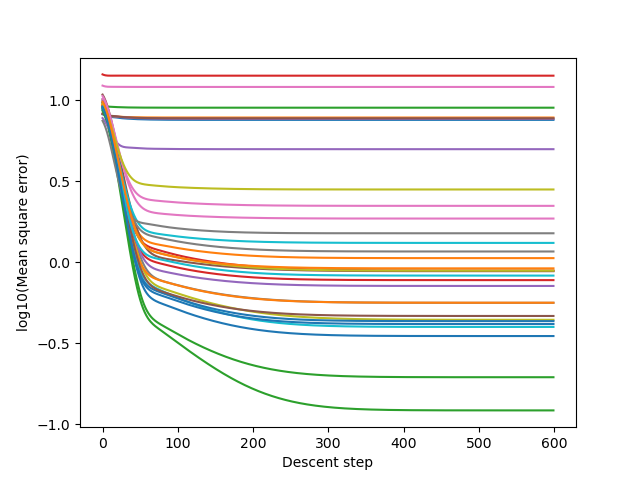

In [16]:
# Import data
paths = df.Path.to_list()
imgs = [load_image(p + '/af_corrected.tif') for p in paths]
rois = [np.loadtxt(p + '/ROI_fit.txt') for p in paths]

# Run quantification
iq = ImageQuant2(img=imgs, roi=rois, cytbg=cytbg, membg=membg)
iq.quantify()

# Plot loss curve
iq.plot_losses(log=True)

# Save results
res = iq.compile_res(ids=df['EmbryoID'].to_list())
res['Membrane signal'] *= calibration_factor
res.to_csv('../../../data/PH_Quantification.csv')